# Import Statements

In [1]:
import pandas as pd
import re
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('car_listings.csv')
df_data

,Brand,Model,Year,Engine Size,Mileage,Price
0,Audi,80,1987,1.6D,404 tūkst.,550 €
1,Audi,A4,2009,2.7D,442 tūkst.,"3,900 €"
2,Audi,A6,2007,2.7D,338 tūkst.,"3,470 €"
3,Audi,Allroad,2007,2.7D,-,"4,900 €"
4,Audi,A4,2012,2.0D,-,"8,790 €"
...,...,...,...,...,...,...
19563,Volvo,V60,2018,2.0,116 tūkst.,"25,990 €"
19564,Volvo,240,1985,2.5,207 tūkst.,"2,300 €"
19565,Volvo,740,1989,2.3,532 tūkst.,"2,500 €"
19566,Volvo,S70,2000,2.4,272 tūkst.,"3,500 €"


# Preliminary Data Exploration

In [3]:
df_data.shape

(19568, 6)

In [4]:
df_data.columns

Index(['Brand', 'Model', 'Year', 'Engine Size', 'Mileage', 'Price'], dtype='object')

In [5]:
df_data.isna().any()

Brand          False
Model          False
Year           False
Engine Size    False
Mileage        False
Price          False
dtype: bool

In [6]:
df_data.duplicated().value_counts()

False    19158
True       410
Name: count, dtype: int64

# Data Cleaning

In [7]:
df_data[df_data.duplicated() == True]
df_data = df_data[df_data['Price'] != "pērku"]
df_data[df_data.duplicated() == True]

,Brand,Model,Year,Engine Size,Mileage,Price
764,Audi,Q5,2009,3.0D,-,"9,950 €"
1169,Audi,A6,2006,3.0D,-,"3,990 €"
1401,Audi,TT,1999,1.8,-,"2,000 €"
1474,Audi,A4,2012,2.0D,-,"8,950 €"
1574,Audi,A6,2006,3.0D,-,"3,990 €"
...,...,...,...,...,...,...
19309,Volvo,V70,2010,1.6D,-,"5,900 €"
19374,Volvo,V70,2008,2.4D,-,"5,490 €"
19390,Volvo,XC 60,2012,2.4D,-,"10,990 €"
19393,Volvo,V70,2007,2.4D,-,"3,800 €"


In [8]:
df_data['Mileage'].value_counts()

Mileage
-             3673
250 tūkst.     135
270 tūkst.     135
300 tūkst.     134
280 tūkst.     127
              ... 
9.2 tūkst.       1
545 tūkst.       1
60               1
3.3 tūkst.       1
688 tūkst.       1
Name: count, Length: 669, dtype: int64

In [9]:
df_data = df_data[df_data['Mileage'] != "-"]

In [10]:
df_data[df_data['Mileage'] == "1.1 tūkst."]

,Brand,Model,Year,Engine Size,Mileage,Price
8494,Lexus,ES,2023,2.5H,1.1 tūkst.,"43,900 €"


In [11]:
def convert_mileage(mileage):
  if 'tūkst.' in mileage:
        mileage = mileage.replace(' tūkst.', '').replace(' ', '')
        return int(float(mileage) * 1000)
  else:
      mileage = mileage.replace(' ', '').replace(',', '')
      return int(mileage)

df_data['Mileage'] = df_data['Mileage'].apply(convert_mileage)
df_data

<ipython-input-11-11d22ee24e30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Mileage'] = df_data['Mileage'].apply(convert_mileage)


,Brand,Model,Year,Engine Size,Mileage,Price
0,Audi,80,1987,1.6D,404000,550 €
1,Audi,A4,2009,2.7D,442000,"3,900 €"
2,Audi,A6,2007,2.7D,338000,"3,470 €"
5,Audi,A4,2001,1.8,374000,"1,550 €"
6,Audi,A4,2013,2.0D,269000,"9,690 €"
...,...,...,...,...,...,...
19563,Volvo,V60,2018,2.0,116000,"25,990 €"
19564,Volvo,240,1985,2.5,207000,"2,300 €"
19565,Volvo,740,1989,2.3,532000,"2,500 €"
19566,Volvo,S70,2000,2.4,272000,"3,500 €"


In [12]:
df_data.rename(columns={'Mileage': 'Mileage (km)'}, inplace=True)
df_data


<ipython-input-12-be32c25e5603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'Mileage': 'Mileage (km)'}, inplace=True)


,Brand,Model,Year,Engine Size,Mileage (km),Price
0,Audi,80,1987,1.6D,404000,550 €
1,Audi,A4,2009,2.7D,442000,"3,900 €"
2,Audi,A6,2007,2.7D,338000,"3,470 €"
5,Audi,A4,2001,1.8,374000,"1,550 €"
6,Audi,A4,2013,2.0D,269000,"9,690 €"
...,...,...,...,...,...,...
19563,Volvo,V60,2018,2.0,116000,"25,990 €"
19564,Volvo,240,1985,2.5,207000,"2,300 €"
19565,Volvo,740,1989,2.3,532000,"2,500 €"
19566,Volvo,S70,2000,2.4,272000,"3,500 €"


In [13]:
df_data['Price'] = df_data['Price'].str.replace(',', '').str.replace(' €', '').str.replace(' maiņai', '').astype(int)
df_data

,Brand,Model,Year,Engine Size,Mileage (km),Price
0,Audi,80,1987,1.6D,404000,550
1,Audi,A4,2009,2.7D,442000,3900
2,Audi,A6,2007,2.7D,338000,3470
5,Audi,A4,2001,1.8,374000,1550
6,Audi,A4,2013,2.0D,269000,9690
...,...,...,...,...,...,...
19563,Volvo,V60,2018,2.0,116000,25990
19564,Volvo,240,1985,2.5,207000,2300
19565,Volvo,740,1989,2.3,532000,2500
19566,Volvo,S70,2000,2.4,272000,3500


In [14]:
df_data['Year'] = pd.to_numeric(df_data['Year'])

In [15]:
df_data

,Brand,Model,Year,Engine Size,Mileage (km),Price
0,Audi,80,1987,1.6D,404000,550
1,Audi,A4,2009,2.7D,442000,3900
2,Audi,A6,2007,2.7D,338000,3470
5,Audi,A4,2001,1.8,374000,1550
6,Audi,A4,2013,2.0D,269000,9690
...,...,...,...,...,...,...
19563,Volvo,V60,2018,2.0,116000,25990
19564,Volvo,240,1985,2.5,207000,2300
19565,Volvo,740,1989,2.3,532000,2500
19566,Volvo,S70,2000,2.4,272000,3500


In [16]:
# Function to extract numeric engine size and engine type
def extract_engine_info(engine_size):
    if pd.isna(engine_size):
        return None, None
    if 'H' in engine_size:
        size = float(re.findall(r"\d+\.\d+|\d+", engine_size)[0])
        type_ = 'Hybrid'
    elif 'E' in engine_size:
        size = None
        type_ = 'Electric'
    elif 'D' in engine_size:
        size = float(re.findall(r"\d+\.\d+|\d+", engine_size)[0])
        type_ = 'Diesel'
    else:
        size = float(re.findall(r"\d+\.\d+|\d+", engine_size)[0])
        type_ = 'Petrol'
    return size, type_


df_data[['Engine Size (L)', 'Engine Type']] = df_data['Engine Size'].apply(lambda x: pd.Series(extract_engine_info(x)))

df_data.drop(columns=['Engine Size'], inplace=True)

In [17]:
df_data

,Brand,Model,Year,Mileage (km),Price,Engine Size (L),Engine Type
0,Audi,80,1987,404000,550,1.6,Diesel
1,Audi,A4,2009,442000,3900,2.7,Diesel
2,Audi,A6,2007,338000,3470,2.7,Diesel
5,Audi,A4,2001,374000,1550,1.8,Petrol
6,Audi,A4,2013,269000,9690,2.0,Diesel
...,...,...,...,...,...,...,...
19563,Volvo,V60,2018,116000,25990,2.0,Petrol
19564,Volvo,240,1985,207000,2300,2.5,Petrol
19565,Volvo,740,1989,532000,2500,2.3,Petrol
19566,Volvo,S70,2000,272000,3500,2.4,Petrol


In [18]:
df_data[df_data['Engine Size (L)'].isna() == True].head(50)

,Brand,Model,Year,Mileage (km),Price,Engine Size (L),Engine Type
168,Audi,E-tron,2023,18000,57900,NaN,Electric
314,Audi,E-tron,2019,69000,42900,NaN,Electric
420,Audi,E-tron,2021,50000,66900,NaN,Electric
507,Audi,E-tron,2021,44000,49500,NaN,Electric
549,Audi,E-tron,2022,56000,49500,NaN,Electric
691,Audi,E-tron,2020,40000,49900,NaN,Electric
772,Audi,E-tron,2021,21000,46900,NaN,Electric
942,Audi,E-tron,2021,38000,48990,NaN,Electric
989,Audi,E-tron,2020,39000,50990,NaN,Electric
1135,Audi,E-tron,2022,49000,53900,NaN,Electric


In [19]:
df_data['Engine Size (L)'] = df_data['Engine Size (L)'].fillna(0)
df_data[df_data['Engine Type'] == 'Electric']

,Brand,Model,Year,Mileage (km),Price,Engine Size (L),Engine Type
168,Audi,E-tron,2023,18000,57900,0.0,Electric
314,Audi,E-tron,2019,69000,42900,0.0,Electric
420,Audi,E-tron,2021,50000,66900,0.0,Electric
507,Audi,E-tron,2021,44000,49500,0.0,Electric
549,Audi,E-tron,2022,56000,49500,0.0,Electric
...,...,...,...,...,...,...,...
16779,Volkswagen,Golf 7,2020,108000,14990,0.0,Electric
17096,Volkswagen,Crafter,2018,26000,33000,0.0,Electric
17144,Volkswagen,Citi,2021,29000,26300,0.0,Electric
18720,Volvo,XC 40,2023,13000,53990,0.0,Electric


# Visualizations

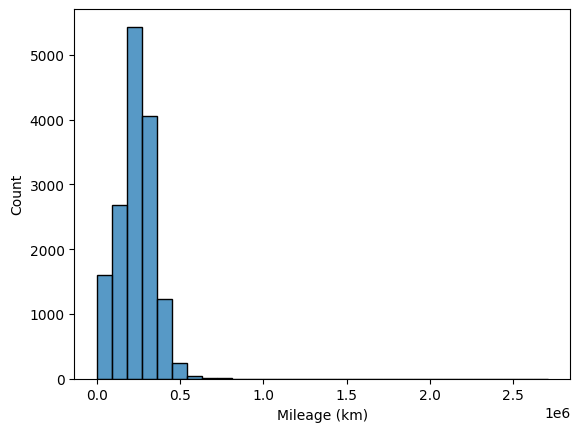

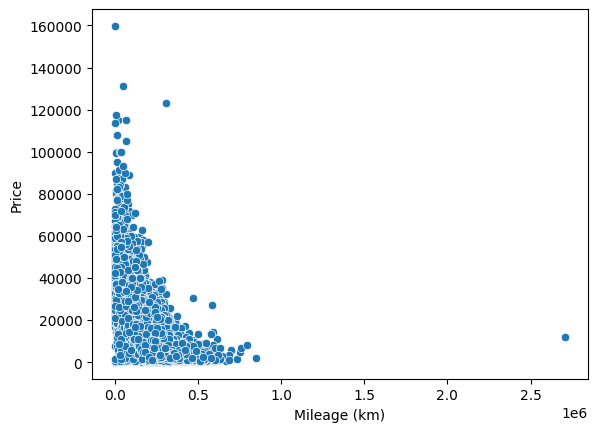

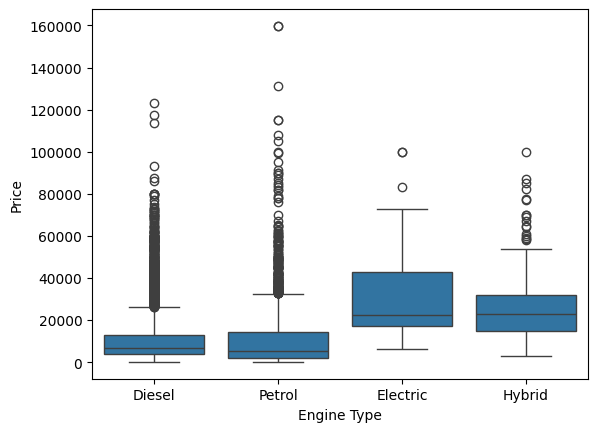

In [20]:
sns.histplot(df_data['Mileage (km)'], bins=30)
plt.show()

sns.scatterplot(x='Mileage (km)', y='Price', data=df_data)
plt.show()

sns.boxplot(x='Engine Type', y='Price', data=df_data)
plt.show()

In [21]:
numeric_df = df_data.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Year,Mileage (km),Price,Engine Size (L)
Year,1.000000,-0.600991,0.666943,-0.181071
Mileage (km),-0.600991,1.000000,-0.587815,0.251745
Price,0.666943,-0.587815,1.000000,0.138726
Engine Size (L),-0.181071,0.251745,0.138726,1.000000






*   We can see strong relationship between Price and Year, the newer the car the more expensive it is.
*   Also a strong negative relationship between mileage and price, the higher the mileage the less the car costs.



# Save file as .pkl to keep data formats.

In [ ]:
df_data.to_pickle('latvia_car_data.pkl')